In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("kidney.csv",index_col=['id'])
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd


In [3]:
x=data.iloc[:,:-1]
x
y=data['classification']
y

id
0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object

In [4]:
class_counts = y.value_counts()
num_classes = len(class_counts)
print("Class Counts:")
print(class_counts)
print("Number of Classes:", num_classes)


Class Counts:
ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64
Number of Classes: 3


In [5]:
# Replace "ckd\t" with "ckd" in the 'classification' column
y = y.replace("ckd\t", "ckd")

# Check the updated class counts and number of classes
class_counts = y.value_counts()
num_classes = len(class_counts)
print("Class Counts:")
print(class_counts)
print("Number of Classes:", num_classes)


Class Counts:
ckd       250
notckd    150
Name: classification, dtype: int64
Number of Classes: 2


In [6]:
# one-hot encoding
x=pd.get_dummies(x,drop_first=True)
x

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,htn_yes,dm_\tyes,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_poor,pe_yes,ane_yes
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,...,1,0,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,...,0,0,0,1,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,...,0,0,0,0,1,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,0,1,0,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,0,0,0,1,0,1,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,0,0,0,1,0,1,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,0,0,0,1,0,1,0,0,0,0


In [7]:
x=pd.DataFrame.fillna(x,0)
x

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,htn_yes,dm_\tyes,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_poor,pe_yes,ane_yes
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,0.0,0.0,...,1,0,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0.0,18.0,0.8,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,0.0,0.0,...,0,0,0,0,1,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,0,1,0,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,0,0,0,1,0,1,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,0,0,0,1,0,1,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,0,0,0,1,0,1,0,0,0,0


In [8]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [9]:
Temp=LabelEncoder()
y=Temp.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
from sklearn.decomposition import PCA
model=PCA(n_components=20)
pca=model.fit_transform(x)
pca

array([[-1.82521253e+01, -1.06697836e+02,  1.80672929e+01, ...,
        -2.42863814e-01,  1.90303838e-01,  6.79309491e-01],
       [-1.43216552e+02, -1.02670068e+02,  7.43787860e+00, ...,
         2.42816118e-02, -4.17997170e-01, -3.96473380e-02],
       [ 2.83665905e+02, -1.26579329e+02,  9.07434209e+00, ...,
         7.07372402e-01, -6.71072312e-01,  8.23677667e-02],
       ...,
       [-3.48463583e+01,  2.12466035e+01, -3.56440936e+01, ...,
        -5.22102655e-02,  7.09491883e-02,  6.13327744e-02],
       [-1.89467882e+01,  2.56959886e+01, -1.47478735e+01, ...,
        -1.55454025e-01,  4.25409516e-02, -1.46600543e-01],
       [-2.20233440e+00,  2.00884948e+01, -4.45123085e+01, ...,
         9.73316882e-02, -5.73506969e-03, -2.01243593e-02]])

In [11]:
from sklearn.model_selection import train_test_split
xtrpca,xtepca,ytrpca,ytepca=train_test_split(pca,y,test_size=0.3,random_state=42)

In [12]:
import tensorflow as tf
from tensorflow import keras

In [24]:
# Define the architecture of the neural network
m6 = keras.Sequential()
m6.add(keras.layers.Dense(units=64, activation='relu', input_dim=xtr.shape[1]))
m6.add(keras.layers.Dropout(0.5))
m6.add(keras.layers.Dense(units=64, activation='relu'))
m6.add(keras.layers.Dropout(0.2))
m6.add(keras.layers.Dense(units=64, activation='relu'))
m6.add(keras.layers.Dropout(0.2))
m6.add(keras.layers.Dense(units=64, activation='relu'))
m6.add(keras.layers.Dense(units=1, activation='softmax'))  # For binary classification, change activation as needed


In [25]:
m6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
m6.summary()# Adjust loss and optimizer as needed

# Train the model
#m6.fit(xtr,ytr, epochs=10, batch_size=32)  # Adjust epochs and batch_size as needed


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4

In [26]:
m6.fit(xtr,ytr, epochs=50, batch_size=32,validation_split=0.2)  # Adjust epochs and batch_size as needed

Epoch 1/50


C:\Users\saipr\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


6/7 [========================>.....] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.3802

C:\Users\saipr\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 6s 143ms/step - loss: 0.0000e+00 - accuracy: 0.3616 - val_loss: 0.0000e+00 - val_accuracy: 0.4464
Epoch 2/50
7/7 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 0.3616 - val_loss: 0.0000e+00 - val_accuracy: 0.4464
Epoch 3/50
7/7 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.3616 - val_loss: 0.0000e+00 - val_accuracy: 0.4464
Epoch 4/50
7/7 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 0.3616 - val_loss: 0.0000e+00 - val_accuracy: 0.4464
Epoch 5/50
7/7 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - accuracy: 0.3616 - val_loss: 0.0000e+00 - val_accuracy: 0.4464
Epoch 6/50
7/7 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - accuracy: 0.3616 - val_loss: 0.0000e+00 - val_accuracy: 0.4464
Epoch 7/50
7/7 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - accuracy: 0.3616 - val_loss: 0.0000e+00 - va

In [70]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [71]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(xtrpca,ytrpca)
ypr1=NB.predict(xtepca)
ypr1

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [72]:
from sklearn.metrics import accuracy_score,classification_report
ac1=accuracy_score(ypr1,ytepca)
model.append('NB')
acc.append(ac1)

In [54]:
print(classification_report(ypr1,ytepca))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        80
           1       0.89      0.97      0.93        40

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.95      0.95      0.95       120



In [73]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=39,random_state=2)
LR.fit(xtrpca,ytrpca)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=39, random_state=2)

In [74]:
ypr2=LR.predict(xtepca)
ypr2
ac2=accuracy_score(ypr2,ytepca)
model.append('LR')
acc.append(ac2)

In [57]:
print(classification_report(ypr2,ytepca))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.96      0.98        46

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [75]:
from sklearn.neural_network import MLPClassifier
MLP=MLPClassifier(activation='relu',learning_rate='constant')
MLP.fit(xtrpca,ytrpca)
ypr3=MLP.predict(xtepca)
ypr3
ac3=accuracy_score(ypr3,ytepca)
print(classification_report(ypr3,ytepca))
model.append('MLP')
acc.append(ac3)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        69
           1       1.00      0.86      0.93        51

    accuracy                           0.94       120
   macro avg       0.95      0.93      0.94       120
weighted avg       0.95      0.94      0.94       120



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [76]:
from sklearn.ensemble import VotingClassifier
ensemble_model=VotingClassifier(estimators=[('MLP',m3),
    ('logistic_regression',m2)],voting='soft')

In [77]:
ensemble_model.fit(xtrpca,ytrpca)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('MLP', MLPClassifier()),
                             ('logistic_regression',
                              LogisticRegression(max_iter=39, random_state=2))],
                 voting='soft')

In [78]:
predictions = ensemble_model.predict(xtepca)


In [79]:
accuracy = accuracy_score(ytepca, predictions)
print(f'Accuracy of the ensemble model: {accuracy:.2f}')
model.append('ensemble_model')
acc.append(accuracy)

Accuracy of the ensemble model: 0.97


In [80]:
print(classification_report(predictions,ytepca))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

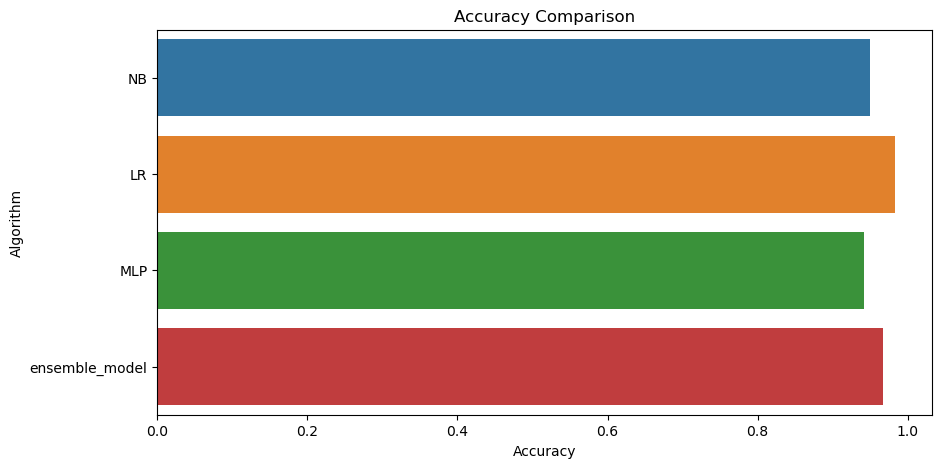

In [81]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x=acc,y=model)